In [511]:
from inspect import CORO_RUNNING
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from babel.util import missing

# Define columns
columns = [
    "Timestamp", "Latitude", "Longitude", "Speed", "Heading", "Altitude",
    "Engine_RPM", "Fuel_Level", "Odometer", "Accel_X", "Accel_Y", "Accel_Z",
    "Brake_Status", "Coolant_Temp", "Throttle_Position", "Ignition", "Movement",
    "Network_Jamming", "GNSS_Jamming", "Over_Speeding",
    "Harsh_Acceleration", "Harsh_Braking", "Harsh_Cornering",
    "Digital_Input_1", "Digital_Input_2",
    "Analog_Input_1", "Analog_Input_2",
    "Beacon_Detection_Status", "Beacon_List", "Beacon_Record_Period",
    "Beacon_Record_Priority", "Immobilizer_Status", "iButton_Notification",
    "GNSS_Fuel_Counter", "DOUT_Control_via_Call", "Ignition_ON_Counter",
    "DOUT_1_Output_Type"
]

n_rows = 500  # Number of data points

# Create timestamps spaced by 5 minutes
timestamps = pd.date_range("2025-06-13 10:00:00", periods=n_rows, freq="5T")

# Generate data with plausible ranges
np.random.seed(42)
data = {
    "Timestamp": timestamps,
    "Latitude": 41.0082 + np.random.normal(0, 0.0005, n_rows),
    "Longitude": 28.9784 + np.random.normal(0, 0.0005, n_rows),
    "Speed": np.clip(np.random.normal(50, 5, n_rows), 0, 120),
    "Heading": np.mod(np.random.normal(90, 10, n_rows), 360),
    "Altitude": np.clip(np.random.normal(10, 1, n_rows), 5, 15),
    "Engine_RPM": np.clip(np.random.normal(3000, 200, n_rows), 800, 6000),
    "Fuel_Level": np.clip(np.linspace(75, 50, n_rows) + np.random.normal(0, 2, n_rows), 0, 100),
    "Odometer": 150000 + np.cumsum(np.random.normal(0.5, 0.1, n_rows)),
    "Accel_X": np.random.normal(0, 0.05, n_rows),
    "Accel_Y": np.random.normal(0, 0.05, n_rows),
    "Accel_Z": np.random.normal(1, 0.05, n_rows),
    "Brake_Status": np.random.choice([0,1], n_rows, p=[0.8, 0.2]),
    "Coolant_Temp": np.clip(np.random.normal(90, 5, n_rows), 70, 110),
    "Throttle_Position": np.clip(np.random.normal(25, 5, n_rows), 0, 100),
    "Ignition": 1,
    "Movement": 1,
    "Network_Jamming": np.zeros(n_rows, dtype=int),
    "GNSS_Jamming": np.zeros(n_rows, dtype=int),
    "Over_Speeding": np.zeros(n_rows, dtype=int),
    "Harsh_Acceleration": np.random.choice([0,1], n_rows, p=[0.9, 0.1]),
    "Harsh_Braking": np.random.choice([0,1], n_rows, p=[0.95, 0.05]),
    "Harsh_Cornering": np.random.choice([0,1], n_rows, p=[0.9, 0.1]),
    "Digital_Input_1": np.random.choice([0,1], n_rows),
    "Digital_Input_2": np.random.choice([0,1], n_rows),
    "Analog_Input_1": np.random.normal(3.3, 0.3, n_rows),
    "Analog_Input_2": np.random.normal(2.5, 0.2, n_rows),
    "Beacon_Detection_Status": np.random.choice([0,1], n_rows, p=[0.7, 0.3]),
    "Beacon_List": np.random.choice(["BeaconA", "BeaconB", "BeaconC", "BeaconA,BeaconB", ""], n_rows),
    "Beacon_Record_Period": 60,
    "Beacon_Record_Priority": np.random.choice([1,2], n_rows),
    "Immobilizer_Status": np.random.choice([0,1], n_rows, p=[0.95, 0.05]),
    "iButton_Notification": np.random.choice([0,1], n_rows, p=[0.98, 0.02]),
    "GNSS_Fuel_Counter": np.cumsum(np.random.normal(0.01, 0.005, n_rows)),
    "DOUT_Control_via_Call": np.random.choice([0,1], n_rows, p=[0.99, 0.01]),
    "Ignition_ON_Counter": np.arange(1, n_rows + 1),
    "DOUT_1_Output_Type": np.random.choice([1,2], n_rows)
}

df = pd.DataFrame(data, columns=columns)

print(df.head())


            Timestamp   Latitude  Longitude      Speed    Heading  Altitude  \
0 2025-06-13 10:00:00  41.008448  28.978863  56.996777  97.783611  9.324822   
1 2025-06-13 10:05:00  41.008131  28.979355  54.623168  84.488143  9.855481   
2 2025-06-13 10:10:00  41.008524  28.977701  50.298152  81.818011  9.207580   
3 2025-06-13 10:15:00  41.008962  28.978681  46.765316  89.966255  9.692038   
4 2025-06-13 10:20:00  41.008083  28.978075  53.491117  88.298154  8.106385   

    Engine_RPM  Fuel_Level       Odometer   Accel_X  ...  \
0  3114.122599   71.184385  150000.618064 -0.043175  ...   
1  3193.636932   73.229130  150001.055333 -0.001560  ...   
2  2933.738323   74.072589  150001.559855  0.000901  ...   
3  2877.552653   78.625075  150002.064975  0.023632  ...   
4  2782.969895   75.912705  150002.514796 -0.068343  ...   

   Beacon_Detection_Status      Beacon_List  Beacon_Record_Period  \
0                        0          BeaconC                    60   
1                        1

/var/folders/34/541jkjcx5wjddf043hxdjdxm0000gn/T/ipykernel_22932/275845716.py:26: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  timestamps = pd.date_range("2025-06-13 10:00:00", periods=n_rows, freq="5T")


In [512]:
#data visualization and explanation
import matplotlib.pyplot as plt
# Display basic statistics of the dataset
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Timestamp                500 non-null    datetime64[ns]
 1   Latitude                 500 non-null    float64       
 2   Longitude                500 non-null    float64       
 3   Speed                    500 non-null    float64       
 4   Heading                  500 non-null    float64       
 5   Altitude                 500 non-null    float64       
 6   Engine_RPM               500 non-null    float64       
 7   Fuel_Level               500 non-null    float64       
 8   Odometer                 500 non-null    float64       
 9   Accel_X                  500 non-null    float64       
 10  Accel_Y                  500 non-null    float64       
 11  Accel_Z                  500 non-null    float64       
 12  Brake_Status             500 non-nul

,Timestamp,Latitude,Longitude,Speed,Heading,Altitude,Engine_RPM,Fuel_Level,Odometer,Accel_X,...,Analog_Input_2,Beacon_Detection_Status,Beacon_Record_Period,Beacon_Record_Priority,Immobilizer_Status,iButton_Notification,GNSS_Fuel_Counter,DOUT_Control_via_Call,Ignition_ON_Counter,DOUT_1_Output_Type
count,500,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.0,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,2025-06-14 06:47:29.999999744,41.008203,28.978416,50.542423,90.331879,9.988484,3004.636958,62.462947,150125.304620,-0.004702,...,2.498305,0.280000,60.0,1.522000,0.044000,0.02000,2.601743,0.016000,250.500000,1.502000
min,2025-06-13 10:00:00,41.006579,28.977052,35.518723,60.596114,6.980488,2401.772806,45.695529,150000.618064,-0.150382,...,1.995679,0.000000,60.0,1.000000,0.000000,0.00000,0.013914,0.000000,1.000000,1.000000
25%,2025-06-13 20:23:45,41.007850,28.978102,46.987852,83.880638,9.339264,2874.569520,56.070015,150063.764807,-0.036042,...,2.374782,0.000000,60.0,1.000000,0.000000,0.00000,1.322080,0.000000,125.750000,1.000000
50%,2025-06-14 06:47:30,41.008206,28.978414,50.599029,89.910866,9.996848,3000.707118,62.899799,150126.518221,-0.002582,...,2.499614,0.000000,60.0,2.000000,0.000000,0.00000,2.595950,0.000000,250.500000,2.000000
75%,2025-06-14 17:11:15,41.008518,28.978726,53.773692,96.997694,10.669176,3126.453427,68.530958,150186.095041,0.028569,...,2.632345,1.000000,60.0,2.000000,0.000000,0.00000,3.893999,0.000000,375.250000,2.000000
max,2025-06-15 03:35:00,41.010126,28.979716,63.008416,121.931076,13.109919,3785.247541,78.625075,150249.054395,0.140733,...,3.053675,1.000000,60.0,2.000000,1.000000,1.00000,5.079313,1.000000,500.000000,2.000000
std,NaN,0.000491,0.000489,5.051232,9.840661,0.959566,201.487707,7.414748,71.577009,0.049580,...,0.191602,0.449449,0.0,0.500016,0.205301,0.14014,1.457776,0.125601,144.481833,0.500497


<Figure size 1200x600 with 0 Axes>

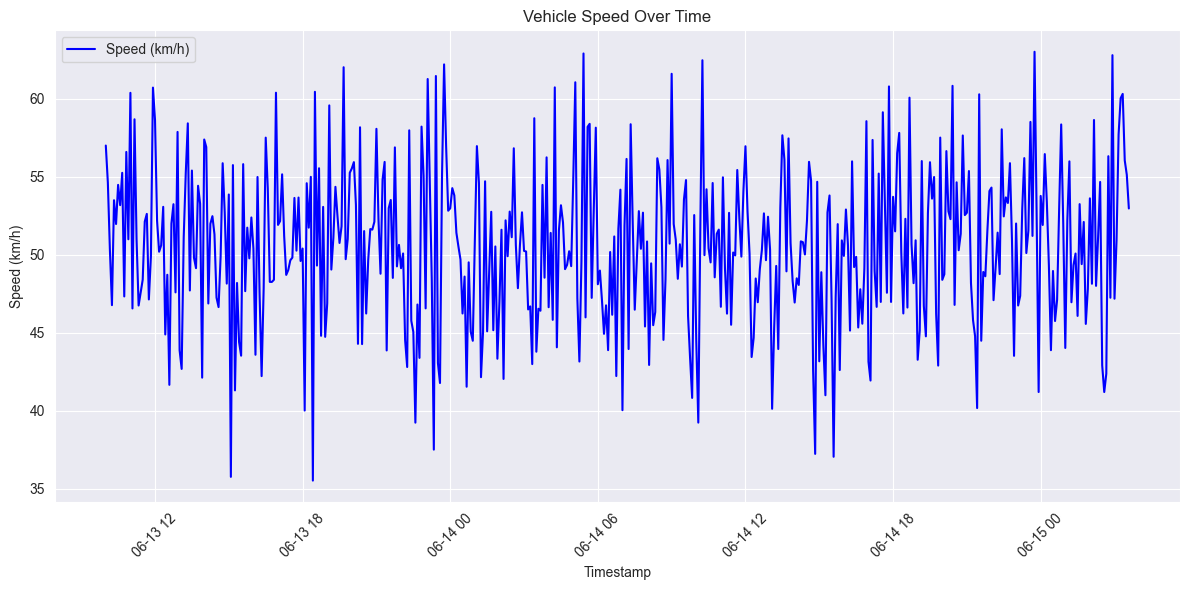

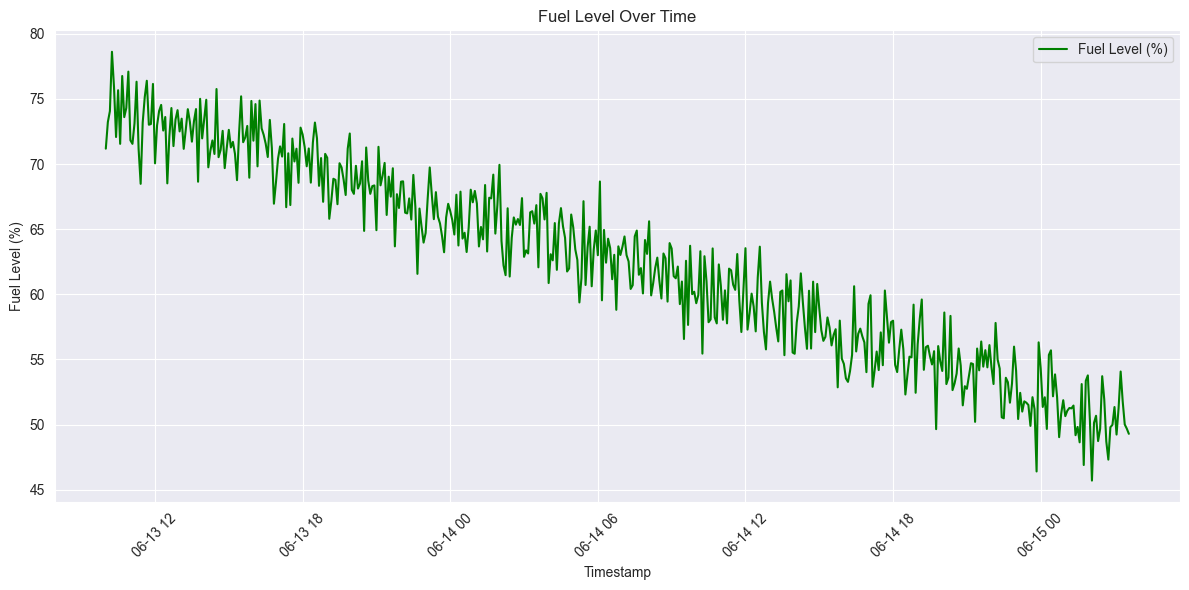

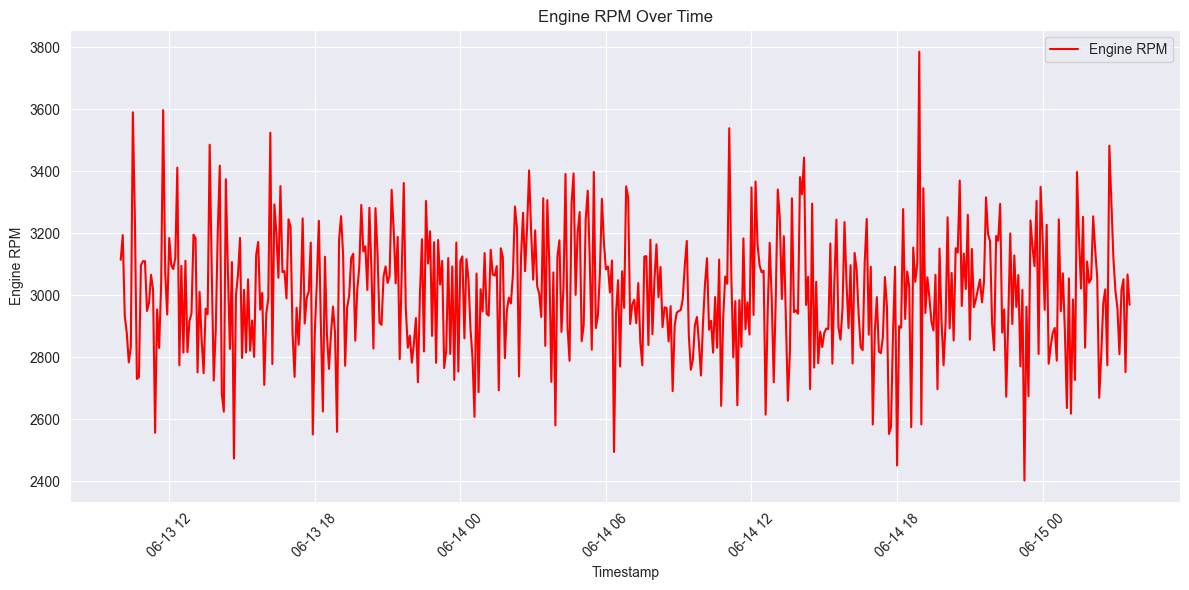

<Figure size 1200x600 with 0 Axes>

In [513]:
# Visualizing the data
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Speed'], label='Speed (km/h)', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Speed (km/h)')
plt.title('Vehicle Speed Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Fuel_Level'], label='Fuel Level (%)', color='green')
plt.xlabel('Timestamp')
plt.ylabel('Fuel Level (%)')
plt.title('Fuel Level Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Engine_RPM'], label='Engine RPM', color='red')
plt.xlabel('Timestamp')
plt.ylabel('Engine RPM')
plt.title('Engine RPM Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.figure(figsize=(12, 6))


In [514]:
#data preproccessing

print(df.isnull().sum())  # Check for missing values

# Replace missing values with the mean of each column
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

#if there is any categorical data, convert it to numerical
#data.replace({'sentiment': {'positive': 1, 'negative': 0}}, inplace=True)
df = df.loc[:, (df != 0).any(axis=0)]

#remove columns ıgnition and movement and beacon record period
df.drop(columns=["Ignition", "Movement", "Beacon_Record_Period"], inplace=True)

Timestamp                  0
Latitude                   0
Longitude                  0
Speed                      0
Heading                    0
Altitude                   0
Engine_RPM                 0
Fuel_Level                 0
Odometer                   0
Accel_X                    0
Accel_Y                    0
Accel_Z                    0
Brake_Status               0
Coolant_Temp               0
Throttle_Position          0
Ignition                   0
Movement                   0
Network_Jamming            0
GNSS_Jamming               0
Over_Speeding              0
Harsh_Acceleration         0
Harsh_Braking              0
Harsh_Cornering            0
Digital_Input_1            0
Digital_Input_2            0
Analog_Input_1             0
Analog_Input_2             0
Beacon_Detection_Status    0
Beacon_List                0
Beacon_Record_Period       0
Beacon_Record_Priority     0
Immobilizer_Status         0
iButton_Notification       0
GNSS_Fuel_Counter          0
DOUT_Control_v

In [515]:
# Ensure the Timestamp column is in datetime format
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
#print(df["Timestamp"].dtype)

# Set the Timestamp as the index
df.set_index("Timestamp", inplace=True)

# Resample the data to 1-minute intervals, filling missing values with the mean
#df_resampled = df.resample("1T").mean(numeric_only=True)
# Fill any remaining NaN values after resampling
#df_resampled.fillna(method='ffill', inplace=True)
# Display the resampled DataFrame
#print(df_resampled.head())
df = df.select_dtypes(include=[np.number])


In [516]:
from sklearn.preprocessing import StandardScaler
import numpy as np

numeric_cols = df.select_dtypes(include=[np.number]).columns #selects all columns have numeric data
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()

,Latitude,Longitude,Speed,Heading,Altitude,Engine_RPM,Fuel_Level,Odometer,Accel_X,Accel_Y,...,Analog_Input_1,Analog_Input_2,Beacon_Detection_Status,Beacon_Record_Priority,Immobilizer_Status,iButton_Notification,GNSS_Fuel_Counter,DOUT_Control_via_Call,Ignition_ON_Counter,DOUT_1_Output_Type
Timestamp,,,,,,,,,,,,,,,,,,,,,
2025-06-13 10:00:00,0.499735,0.915388,1.279058,0.757997,-0.692320,0.543930,1.177406,-1.743736,-0.776750,-0.962802,...,0.518203,1.228455,-0.623610,0.956927,-0.214535,-0.142857,-1.776968,-0.127515,-1.728590,0.996008
2025-06-13 10:05:00,-0.148023,1.921755,0.808681,-0.594430,-0.138746,0.938962,1.453450,-1.737621,0.063426,-1.360055,...,1.218138,1.668589,1.603567,-1.045012,-0.214535,-0.142857,-1.766929,-0.127515,-1.721662,0.996008
2025-06-13 10:10:00,0.653748,-1.464039,-0.048407,-0.866039,-0.814624,-0.352228,1.567318,-1.730565,0.113112,-1.593202,...,-1.887824,-0.706872,1.603567,-1.045012,-0.214535,-0.142857,-1.764254,-0.127515,-1.714734,0.996008
2025-06-13 10:15:00,1.546706,0.543637,-0.748508,-0.037192,-0.309246,-0.631361,2.181910,-1.723501,0.572033,0.421248,...,1.067625,0.845993,-0.623610,0.956927,-0.214535,-0.142857,-1.748810,-0.127515,-1.707806,0.996008
2025-06-13 10:20:00,-0.245841,-0.698522,0.584342,-0.206873,-1.963370,-1.101254,1.815736,-1.717211,-1.284884,-0.211429,...,2.565359,0.808607,1.603567,-1.045012,-0.214535,-0.142857,-1.740994,-0.127515,-1.700877,0.996008


<Axes: >

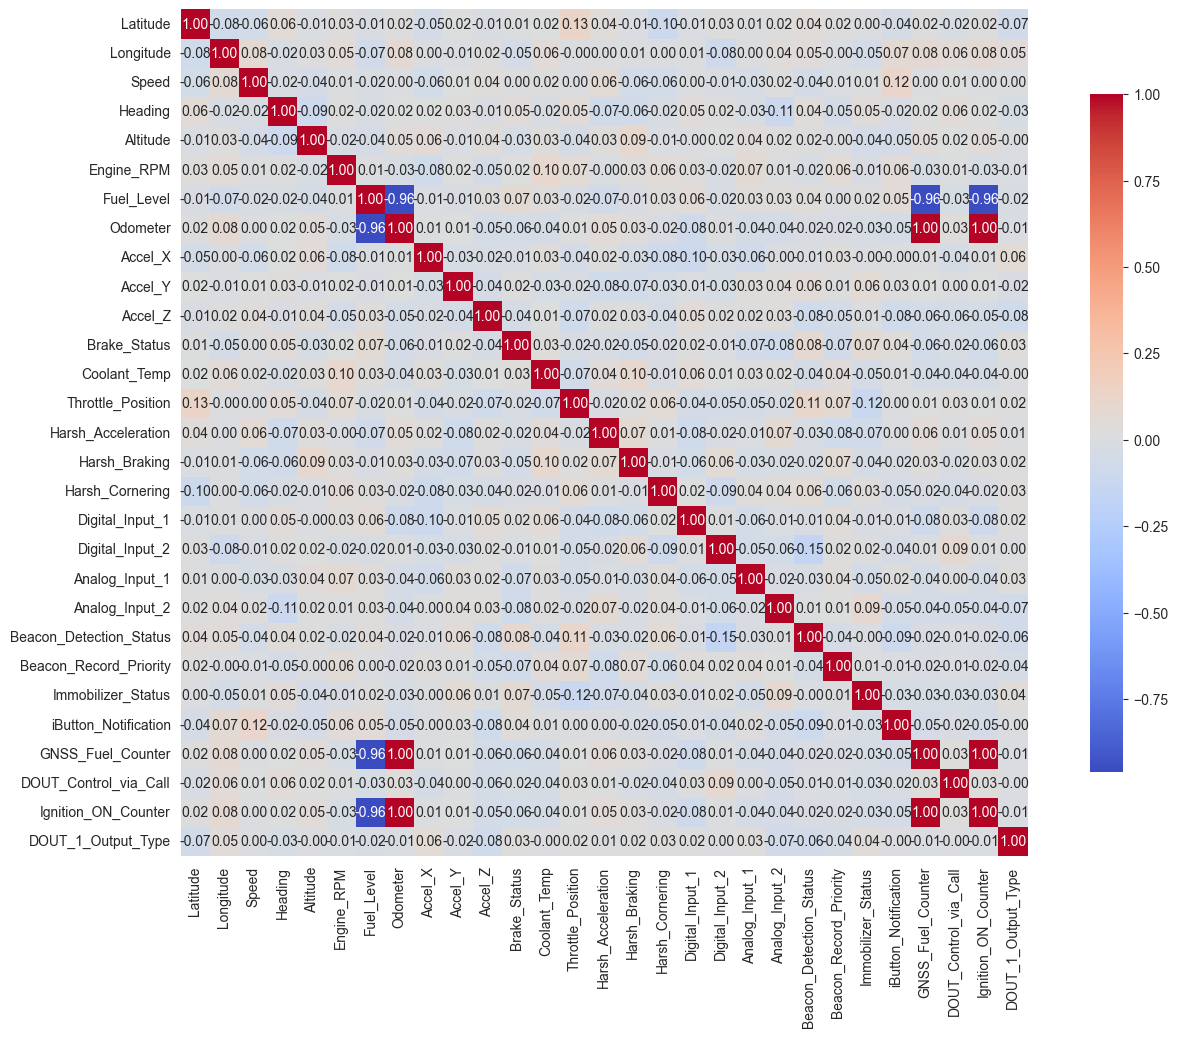

In [517]:
CorrMatrix = df.corr()
plt.figure(figsize=(16, 11))
sns.heatmap(CorrMatrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})

In [518]:
print("features in df", df.columns)
print("Number of features in df: ", len(df.columns))

features in df Index(['Latitude', 'Longitude', 'Speed', 'Heading', 'Altitude', 'Engine_RPM',
       'Fuel_Level', 'Odometer', 'Accel_X', 'Accel_Y', 'Accel_Z',
       'Brake_Status', 'Coolant_Temp', 'Throttle_Position',
       'Harsh_Acceleration', 'Harsh_Braking', 'Harsh_Cornering',
       'Digital_Input_1', 'Digital_Input_2', 'Analog_Input_1',
       'Analog_Input_2', 'Beacon_Detection_Status', 'Beacon_Record_Priority',
       'Immobilizer_Status', 'iButton_Notification', 'GNSS_Fuel_Counter',
       'DOUT_Control_via_Call', 'Ignition_ON_Counter', 'DOUT_1_Output_Type'],
      dtype='object')
Number of features in df:  29


In [519]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)

    return col_corr

corr_features = correlation(df, 0.6)
len(set(corr_features))
print('correlated features: ', len(set(corr_features)) )

correlated features:  3


In [520]:
"""
def correlation(dataset, lower_threshold, upper_threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if lower_threshold < abs(corr_matrix.iloc[i, j]) <= upper_threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
"""

'\ndef correlation(dataset, lower_threshold, upper_threshold):\n    col_corr = set()\n    corr_matrix = dataset.corr()\n    for i in range(len(corr_matrix.columns)):\n        for j in range(i):\n            if lower_threshold < abs(corr_matrix.iloc[i, j]) <= upper_threshold:\n                colname = corr_matrix.columns[i]\n                col_corr.add(colname)\n    return col_corr\n'

In [521]:
corr_features = correlation(df, 0.085)  # Select features with correlation between 0.05 and 0.1
print(len(corr_features))
print("Number of features to choose due to high correlation: " , set(corr_features))

#remove 1.00 correlated features
corr_features = {feature for feature in correlation(df, 0.085) if not any(df[feature].corr(df[other]) == 1.0 and feature != other for other in df.columns)}

15
Number of features to choose due to high correlation:  {'Beacon_Detection_Status', 'iButton_Notification', 'GNSS_Fuel_Counter', 'Ignition_ON_Counter', 'Analog_Input_2', 'Harsh_Braking', 'Altitude', 'Digital_Input_1', 'Throttle_Position', 'Immobilizer_Status', 'Harsh_Cornering', 'Digital_Input_2', 'DOUT_Control_via_Call', 'Coolant_Temp', 'Odometer'}


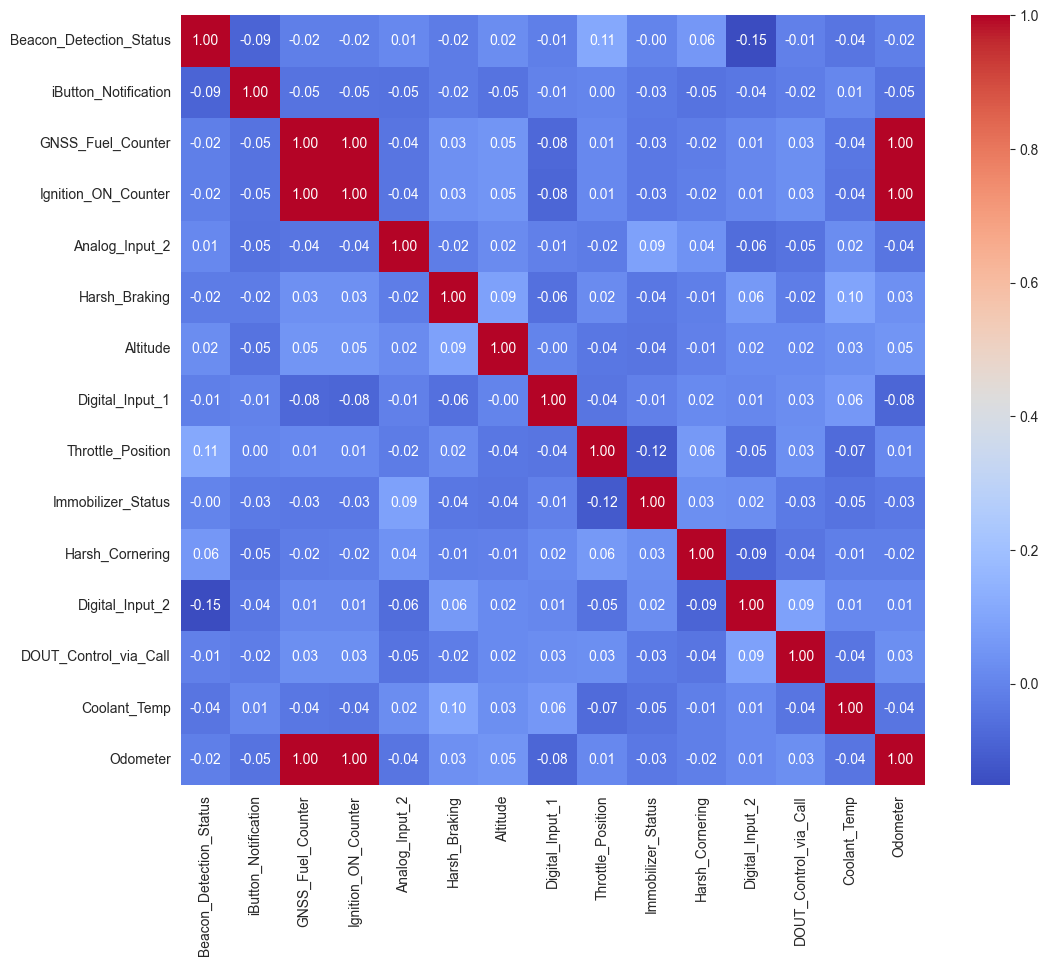

In [522]:
import seaborn as sns
import matplotlib.pyplot as plt
df_reduced = df[list(corr_features)]
corr = df_reduced.corr()

# Plot correlation heatmap (if you have many features, consider limiting to top 20)
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()



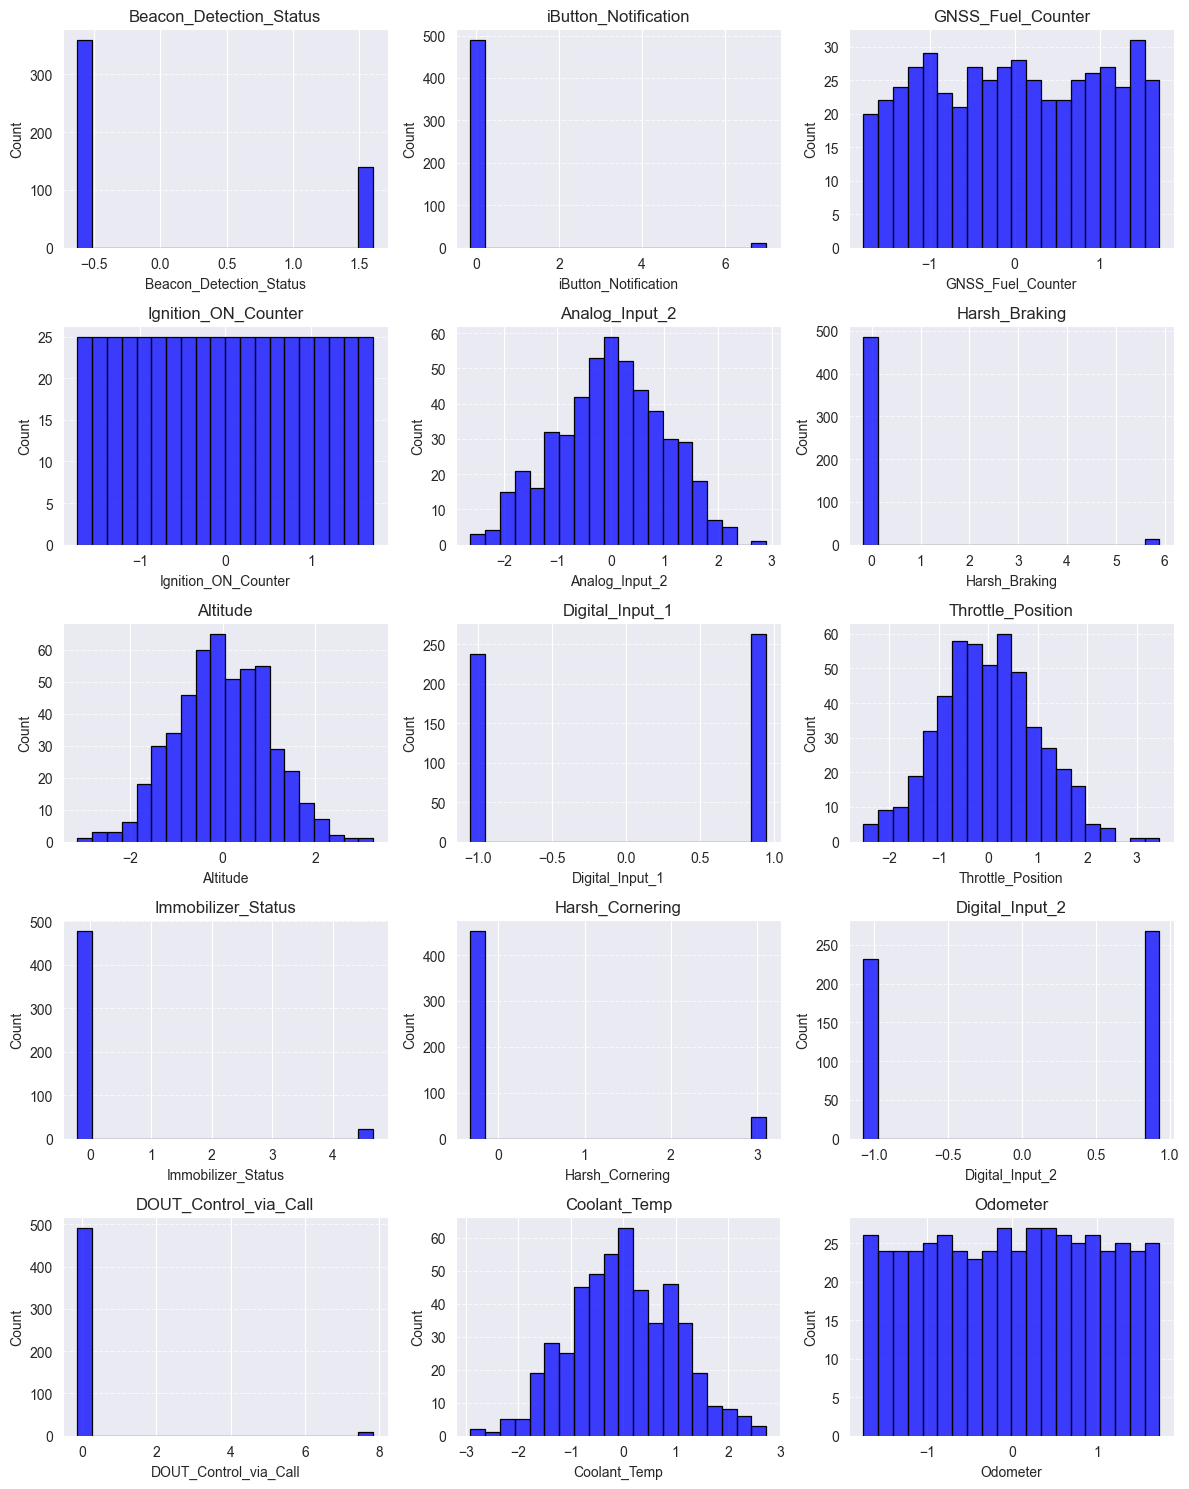

In [531]:
def plot_imbalanced_histograms(df, columns, n_cols=3, bins=20):
    n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate needed rows

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3*n_rows))
    axes = axes.flatten()  # Flatten axes array for easier indexing

    for i, column in enumerate(columns):
        sns.histplot(data=df, x=column, bins=bins, kde=False,
                    color="blue", edgecolor="black", ax=axes[i])
        axes[i].set_title(column)
        axes[i].grid(axis="y", linestyle="--", alpha=0.7)

    # Hide empty subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# Call the function
plot_imbalanced_histograms(df, corr_features)

In [481]:
"""
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90)  # keep 95% variance
X_pca = pca.fit_transform(df)
# Create a DataFrame with PCA results
pc_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pc_columns, index=df.index)
# Display the PCA DataFrame
df.head()

import pandas as pd

loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=numeric_cols)
print(loadings)

# Plot the PCA loadings
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0, xticklabels=loadings.columns.astype(str), yticklabels=loadings.index.astype(str))
plt.title('PCA Loadings')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.tight_layout()
plt.show()

print(loadings.columns)
print(loadings.index)

"""

"\nfrom sklearn.decomposition import PCA\n\npca = PCA(n_components=0.90)  # keep 95% variance\nX_pca = pca.fit_transform(df)\n# Create a DataFrame with PCA results\npc_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]\ndf_pca = pd.DataFrame(X_pca, columns=pc_columns, index=df.index)\n# Display the PCA DataFrame\ndf.head()\n\nimport pandas as pd\n\nloadings = pd.DataFrame(pca.components_.T,\n                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],\n                        index=numeric_cols)\nprint(loadings)\n\n# Plot the PCA loadings\nplt.figure(figsize=(12, 8))\nsns.heatmap(loadings, annot=True, cmap='coolwarm', center=0, xticklabels=loadings.columns.astype(str), yticklabels=loadings.index.astype(str))\nplt.title('PCA Loadings')\nplt.xlabel('Principal Components')\nplt.ylabel('Original Features')\nplt.tight_layout()\nplt.show()\n\nprint(loadings.columns)\nprint(loadings.index)\n\n"